In [1279]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [1281]:
# Load the training and testing data
train_df = pd.read_csv("Desktop/airine/airline_train.csv")
test_df = pd.read_csv("Desktop/airine/airline_test.csv")

In [1283]:
# Display first 5 rows to inspect structure
print("Training data:")
display(train_df.head())

print("Testing data:")
display(test_df.head())

Training data:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Testing data:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [1285]:
# Check shape and column details for training dataset 
print("Train shape:", train_df.shape)

# Show column data types and null values of the tratining dataset 
print("\nTrain info:")
print(train_df.info())

print("\nMissing values per column:")
print(train_df.isnull().sum())



Train shape: (103904, 25)

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  

In [1287]:
# Check shape and column details for testing dataset 
print("Test shape:", test_df.shape)

# Show column data types and null values of the testing dataset
print("\nTesting info:")
print(test_df.info())

print("\nMissing values per column:")
print(test_df.isnull().sum())

Test shape: (25976, 25)

Testing info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location  

In [1289]:
train_df = train_df.dropna(subset=['Arrival Delay in Minutes'])

In [1291]:
print("Training shape after dropping:", train_df.shape)

Training shape after dropping: (103594, 25)


In [1293]:
test_df  = test_df.dropna(subset=['Arrival Delay in Minutes'])

In [1295]:
print("Testing shape after dropping:", test_df.shape)

Testing shape after dropping: (25893, 25)


In [1297]:
print("Remaining null values in training:", train_df['Arrival Delay in Minutes'].isnull().sum())
print("Remaining null values in test:", test_df['Arrival Delay in Minutes'].isnull().sum())

Remaining null values in training: 0
Remaining null values in test: 0


In [1299]:
# Encoding data columns for train dataset

In [1301]:
# Gender

In [1303]:
print(train_df['Gender'].unique())

['Male' 'Female']


In [1305]:
gender_map = {'Male': 1, 'Female': 0}
train_df['Gender'] = train_df['Gender'].map(gender_map)

In [1307]:
# Customer Type

In [1309]:
print(train_df['Customer Type'].unique())

['Loyal Customer' 'disloyal Customer']


In [1311]:
Customer_Type_map = {'Loyal Customer': 1, 'disloyal Customer': 0}
train_df['Customer Type'] = train_df['Customer Type'].map(Customer_Type_map)

In [1313]:
# Type of Travel

In [1315]:
print(train_df['Type of Travel'].unique())

['Personal Travel' 'Business travel']


In [1317]:
Personal_Travel_map = {'Personal Travel': 1, 'Business travel': 0}
train_df['Type of Travel'] = train_df['Type of Travel'].map(Personal_Travel_map)

In [1319]:
# Class

In [1321]:
print(train_df['Class'].unique())

['Eco Plus' 'Business' 'Eco']


In [1323]:
Class_map = {'Eco Plus': 1, 'Business': 0, 'Eco':2 }
train_df['Class'] = train_df['Class'].map(Class_map)

In [1325]:
print(train_df['satisfaction'].unique())

['neutral or dissatisfied' 'satisfied']


In [1327]:
satisfaction_map = {'satisfied': 1, 'neutral or dissatisfied': 0}
train_df['satisfaction'] = train_df['satisfaction'].map(satisfaction_map)

In [1329]:
display(train_df.head())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,1,13,1,1,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,0,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,1,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,1,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,1,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [1331]:
print("Train shape:", train_df.shape)

Train shape: (103594, 25)


In [1333]:
# Encoding data columns for testing dataset

In [1335]:
# Gender

In [1337]:
print(test_df['Gender'].unique())

['Female' 'Male']


In [1339]:
gender_map = {'Male': 1, 'Female': 0}
test_df['Gender'] = test_df['Gender'].map(gender_map)

In [1341]:
# Customer Type

In [1343]:
print(test_df['Customer Type'].unique())

['Loyal Customer' 'disloyal Customer']


In [1345]:
Customer_Type_map = {'Loyal Customer': 1, 'disloyal Customer': 0}
test_df['Customer Type'] = test_df['Customer Type'].map(Customer_Type_map)

In [1347]:
# Type of Travel

In [1349]:
print(test_df['Type of Travel'].unique())

['Business travel' 'Personal Travel']


In [1351]:
Personal_Travel_map = {'Personal Travel': 1, 'Business travel': 0}
test_df['Type of Travel'] = test_df['Type of Travel'].map(Personal_Travel_map)

In [1353]:
# Class

In [1355]:
print(test_df['Class'].unique())

['Eco' 'Business' 'Eco Plus']


In [1357]:
Class_map = {'Eco Plus': 1, 'Business': 0, 'Eco':2 }
test_df['Class'] = test_df['Class'].map(Class_map)

In [1359]:
print(test_df['satisfaction'].unique())

['satisfied' 'neutral or dissatisfied']


In [1361]:
satisfaction_map = {'satisfied': 1, 'neutral or dissatisfied': 0}
test_df['satisfaction'] = test_df['satisfaction'].map(satisfaction_map)

In [1363]:
display(test_df.head())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,1,52,0,2,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,0,1,36,0,0,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,1,0,20,0,2,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,1,1,44,0,0,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,0,1,49,0,2,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1


In [1365]:
print("Testing shape:", test_df.shape)

Testing shape: (25893, 25)


In [1367]:
# Separate features (X) and target (y)

In [1369]:
X_train = train_df.drop(columns=['satisfaction'])
y_train = train_df['satisfaction']

X_test = test_df.drop(columns=['satisfaction'])
y_test = test_df['satisfaction']

# Confirm
print("X_train shape:", X_train.shape)
print("y_train unique values:", y_train.unique())


X_train shape: (103594, 24)
y_train unique values: [0 1]


In [1371]:
# Train the Models

In [1373]:
# Logistic Regression

In [1375]:
# Initialize the model
log_reg = LogisticRegression(max_iter=500, random_state=42)

In [1377]:
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

C:\Users\Sachintha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1379]:
# Calculate evaluation metrics
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

In [1381]:
# Print results
print("Logistic Regression Results")
print("Accuracy :", round(acc_log, 4))
print("Precision:", round(prec_log, 4))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results
Accuracy : 0.798
Precision: 0.7412

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81     14528
           1       0.74      0.83      0.78     11365

    accuracy                           0.80     25893
   macro avg       0.80      0.80      0.80     25893
weighted avg       0.80      0.80      0.80     25893



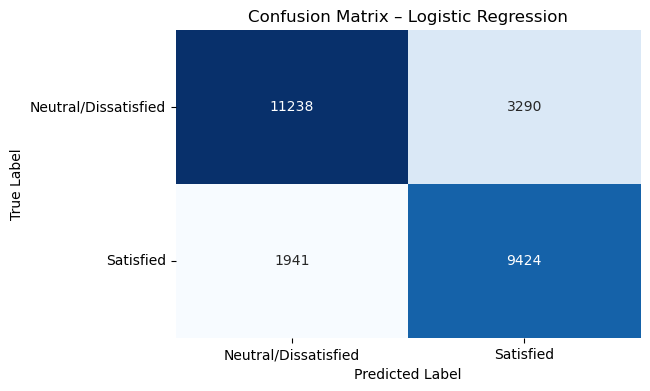

In [1383]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Neutral/Dissatisfied', 'Satisfied'])
plt.yticks([0.5, 1.5], ['Neutral/Dissatisfied', 'Satisfied'], rotation=0)
plt.show()

In [1385]:
# Desition Tree

In [1387]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_leaf=5, random_state=42)

In [1389]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [1390]:
# Calculate evaluation metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [1393]:
# Print results
print("Decision tree Results")
print("Accuracy :", round(acc_dt, 4))
print("Precision:", round(prec_dt, 4))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision tree Results
Accuracy : 0.95
Precision: 0.9449

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     14528
           1       0.94      0.94      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



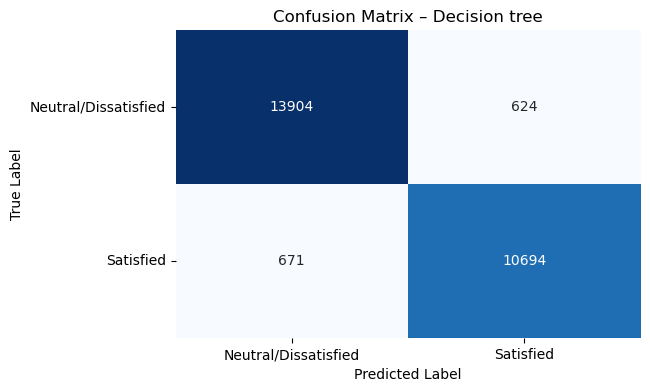

In [1395]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix – Decision tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Neutral/Dissatisfied', 'Satisfied'])
plt.yticks([0.5, 1.5], ['Neutral/Dissatisfied', 'Satisfied'], rotation=0)
plt.show()

In [1397]:
# Random Forest 

In [1399]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=5, n_jobs=-1, random_state=42)

In [1401]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [1402]:
# Calculate evaluation metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [1403]:
# Print results
print("Random Forest Results")
print("Accuracy :", round(acc_rf, 4))
print("Precision:", round(prec_rf, 4))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results
Accuracy : 0.9621
Precision: 0.9704

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



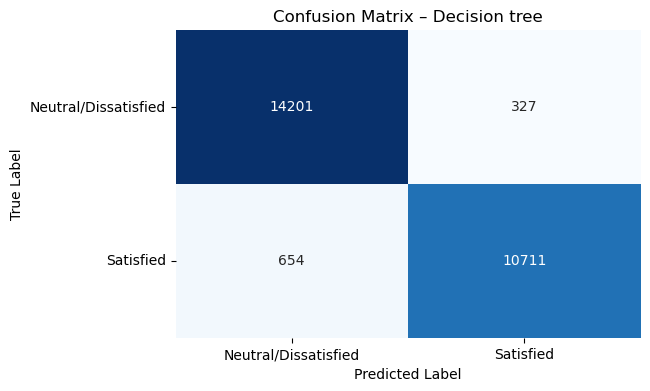

In [1407]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix – Decision tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Neutral/Dissatisfied', 'Satisfied'])
plt.yticks([0.5, 1.5], ['Neutral/Dissatisfied', 'Satisfied'], rotation=0)
plt.show()

In [1416]:
# SVM Model 

In [1418]:
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

In [1420]:
svm_rbf.fit(X_train, y_train)
y_pred_svm = svm_rbf.predict(X_test)

In [1422]:
# Calculate evaluation metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [1424]:
# Print results
print("SVM Results")
print("Accuracy :", round(acc_svm, 4))
print("Precision:", round(prec_svm, 4))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Results
Accuracy : 0.6459
Precision: 0.6969

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.88      0.74     14528
           1       0.70      0.34      0.46     11365

    accuracy                           0.65     25893
   macro avg       0.66      0.61      0.60     25893
weighted avg       0.66      0.65      0.61     25893



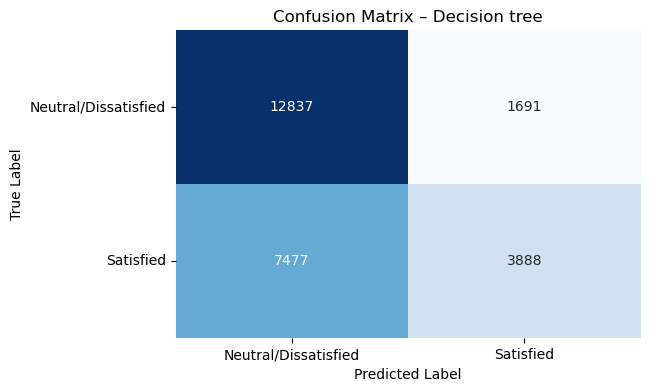

In [1426]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix – Decision tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Neutral/Dissatisfied', 'Satisfied'])
plt.yticks([0.5, 1.5], ['Neutral/Dissatisfied', 'Satisfied'], rotation=0)
plt.show()